In [1]:
#!pip install tensorflow

# Classification

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\henry\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
df = pd.read_csv("data_0.csv")
df.head()

,dependent_var_cont,dependent_var_binary,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8
0,4.662495,1,-0.020203,-1.272966,1.794028,4.186261,-1.583283,1,0,0,0
1,4.992336,1,-0.094311,-0.891598,1.539495,3.980735,-1.964685,0,0,1,0
2,4.522223,1,-0.235722,-1.347074,1.302948,3.626135,-1.755620,0,1,0,0
3,4.127296,0,-0.210721,-0.274437,1.376186,3.812485,-2.587604,0,1,0,0
4,3.239854,0,-0.198451,-1.203973,0.215049,3.229904,-2.029509,0,1,0,0


split into training and test data sets

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X = df[['feature_0', 'feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5','feature_6', 'feature_7','feature_8']].values
y = df['dependent_var_binary'].values

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

scale the data

In [7]:
from sklearn.preprocessing import MinMaxScaler

In [8]:
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)  #combines scaler.fit(X_train)  then X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

create artificial neural network

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout    #Dropout layers randomly turn off a percentage of neurons and help prevent overfitting, may or may not help
from tensorflow.keras.callbacks import EarlyStopping  #Use EarlyStopping to program model to stop training once overfitting starts occuring

In [10]:
X_train.shape

(422, 9)

In [11]:
early_stop = EarlyStopping(monitor='val_loss', mode="min", verbose=1, patience=25)


model = Sequential()

model.add(Dense(9, activation="relu"))    #rule of thumb: X_train has 9 features so start with 9
model.add(Dropout(0.50))
model.add(Dense(4, activation="relu"))
model.add(Dropout(0.50))
model.add(Dense(2, activation="relu"))
model.add(Dropout(0.25))


#Choosing and optimizer and loss:
# for a binary classification problem: model.compile(optimizer='rmsprop', or adam
#loss='binary_crossentropy', metrics=['accuracy'])
model.add(Dense(1, activation='sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer='adam')



model.fit(x=X_train, y=y_train,
          epochs=600,                              #ok to choose arbitrly large number of epoch when utilizing early_stop
          validation_data=(X_test, y_test),       #validation_data argument gives you option to compare training and test validation
          callbacks=[early_stop] 
         )

#if data is vary large consider providing a number for the batch_size argument,
#i.e batch_side =128
#verbose=1 makes tensflow show output of each epochs, verbose=0 show no output

Epoch 1/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.7139 - val_loss: 0.6926
Epoch 2/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.7074 - val_loss: 0.6888
Epoch 3/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.7138 - val_loss: 0.6863
Epoch 4/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6948 - val_loss: 0.6840
Epoch 5/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6913 - val_loss: 0.6820
Epoch 6/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6923 - val_loss: 0.6800
Epoch 7/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6882 - val_loss: 0.6780
Epoch 8/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6883 - val_loss: 0.6761
Epoch 9/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6810 - val_loss: 0.6742
Epoch 10/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6822 - val_loss: 0.6726
Epoch 11/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6762 - val_loss: 0.6707
Epoch 12/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.6470 - val_loss: 0.6295
Epoch 70/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.6576 - val_loss: 0.6293
Epoch 71/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.6536 - val_loss: 0.6290
Epoch 72/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.6674 - val_loss: 0.6288
Epoch 73/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.6569 - val_loss: 0.6285
Epoch 74/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.6593 - val_loss: 0.6283
Epoch 75/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.6515 - val_loss: 0.6280
Epoch 76/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6431 - val_loss: 0.6280
Epoch 77/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.6740 - val_loss: 0.6280
Epoch 78/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.6487 - val_loss: 0.6276
Epoch 79/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.6529 - val_loss: 0.6275
Epoch 80/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.6524 

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.6435 - val_loss: 0.6212
Epoch 138/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.6461 - val_loss: 0.6211
Epoch 139/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.6204 - val_loss: 0.6208
Epoch 140/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.6555 - val_loss: 0.6207
Epoch 141/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.6275 - val_loss: 0.6209
Epoch 142/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.6234 - val_loss: 0.6208
Epoch 143/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.6146 - val_loss: 0.6207
Epoch 144/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.6550 - val_loss: 0.6206
Epoch 144: early stopping


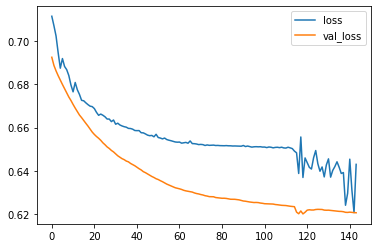

In [12]:
pd.DataFrame(model.history.history).plot()
plt.show()

## How to interpret chart above:
If orange line starts to rise, then there is indication of overfitting.

## Model assessment

In [13]:
from sklearn.metrics import classification_report, confusion_matrix

In [14]:
predictions = model.predict(X_test)
classes_x=np.argmax(predictions,axis=1)

display(classification_report(y_test, classes_x))

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


C:\Users\henry\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\henry\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\henry\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


'              precision    recall  f1-score   support\n\n           0       0.69      1.00      0.82       144\n           1       0.00      0.00      0.00        64\n\n    accuracy                           0.69       208\n   macro avg       0.35      0.50      0.41       208\nweighted avg       0.48      0.69      0.57       208\n'

In [15]:
print(confusion_matrix(y_test, classes_x))

[[144   0]
 [ 64   0]]


## Predicting with new data:

In [16]:
#           feature_0, feature_1, feature_2, feature_3, feature_4, feature_5, feature_6, feature_7, feature_8
new_data = [[-0.083382, -1.203973, 0.829530, 3.958072,  -2.071871, 1, 0, 1, 0]]

In [17]:
new_data = scaler.transform(new_data)
model.predict(new_data)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


array([[0.34636763]], dtype=float32)

## saving a model for later use

In [18]:
from tensorflow.keras.models import load_model

In [19]:
model.save('my_classification_model.keras')

In [20]:
##useing the saved model in the next notebook:
#from tensorflow.keras.models import load_model
#later_model = load_model('my_regression_model.keras')
#later_model.predict(scaler.transform([[0.964006, 3.726185, 0.180000]]))

## is the dependent variable well balanced?

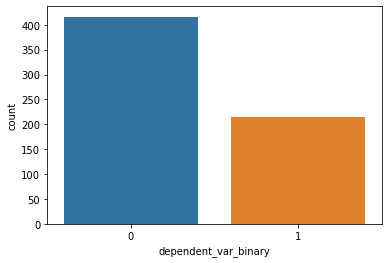

In [21]:
sns.countplot(x='dependent_var_binary', data=df)
plt.show()